In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_pickle('USGS_raw_data.pickle')
df.describe()

,02111500,03086000,03110685,03110690,03111515,03111520,03112500,03114275,03114280,03150700,...,07290880,07331600,07335500,07337000,07344370,07374000,07374525,08266820,07020850,turbidity
count,2190.000000,2192.000000,2176.000000,2150.000000,2183.000000,2168.000000,2149.000000,2174.000000,2173.000000,2183.000000,...,969.000000,2192.000000,2192.000000,2175.000000,2192.000000,2.173000e+03,2.145000e+03,2190.000000,2162.000000,2133.000000
mean,151.140228,34991.245438,12.570827,15.246465,12.745318,15.517721,17.648641,12.877898,14.179991,17.661947,...,35.721889,4781.018431,8989.775091,13088.583908,23500.898723,5.349627e+05,5.259905e+05,67.024338,20.124968,58.842733
std,156.542523,26976.851624,0.387422,2.678622,0.231245,3.100420,2.238204,0.176629,2.324297,2.608087,...,11.093852,10066.992521,19981.561141,25261.199708,31761.111611,2.566121e+05,2.422678e+05,50.502049,8.743033,35.005728
min,38.400000,4040.000000,11.850000,12.410000,12.080000,12.220000,15.420000,12.140000,11.710000,15.030000,...,13.790000,11.400000,177.000000,443.000000,1150.000000,1.410000e+05,7.170000e+04,22.700000,4.860000,6.800000
25%,77.825000,14300.000000,12.240000,13.320000,12.590000,13.230000,16.210000,12.760000,12.670000,15.980000,...,27.090000,160.000000,778.750000,1825.000000,3845.000000,3.200000e+05,3.280000e+05,39.700000,13.510000,30.000000
50%,112.000000,27000.000000,12.430000,14.180000,12.750000,14.350000,16.730000,12.900000,13.230000,16.630000,...,36.050000,783.000000,2100.000000,4270.000000,10200.000000,5.050000e+05,4.910000e+05,48.600000,19.175000,52.900000
75%,167.000000,48025.000000,12.920000,16.307500,12.900000,16.762500,18.200000,13.010000,14.830000,18.365000,...,44.700000,4022.500000,6890.000000,11700.000000,28200.000000,7.070000e+05,7.070000e+05,69.675000,25.507500,80.300000
max,2300.000000,152000.000000,13.620000,28.790000,13.400000,31.850000,30.950000,13.320000,28.360000,34.010000,...,56.690000,70200.000000,223000.000000,254000.000000,206000.000000,1.330000e+06,1.330000e+06,319.000000,48.770000,208.500000


In [28]:
stations = pd.read_pickle('USGS_stations.pickle')
# Define geographical region to search for USGS stations
# These are the key words to put in the USGS search engine
watersheds = ['Missouri',
              'Yellowstone',
              'Platte',
              'Mississippi',
              'Illinois',
              'Ohio',
              'Cumberland',
              'Tennessee',
              'Arkansas',
              'Red']
subset = dict.fromkeys(watersheds,[])
for ws in watersheds:
    subset[ws] = [site_no for site_no in df.columns if site_no in list(stations[stations.watershed==ws].index)]
    print(subset[ws])

['06054500', '06074000', '06090300', '06090800', '06109500', '06341000', '06342020', '06342500', '06441590', '06441595', '06467500', '06486000', '06601200', '06610000', '06807000', '06813500', '06818000', '06893000', '06895500', '06906500', '06909000', '06934500', '06935965']
['06186500', '06191500', '06214500', '06295000', '06309000', '06327500']
['04126740', '06796000', '06805500', '06821190']
['05207600', '05211000', '05227500', '05242300', '05270700', '05288500', '05331000', '05331580', '05344500', '05378500', '05420500', '05474500', '05587450', '07010000', '07020500', '07022000', '07289000', '07290880', '07374000', '07374525', '07020850']
['05543500', '05558300', '05568500', '05568615', '05586100', '05587060', '07194800', '07195400', '07195500', '07196090']
['03086000', '03110685', '03110690', '03111515', '03111520', '03112500', '03114275', '03114280', '03150700', '03277200', '03294500', '03294600', '03303280', '03304300', '03381700']
['03404000', '03404500', '03430250', '03430320

[[ nan  nan]
 [ nan  nan]]


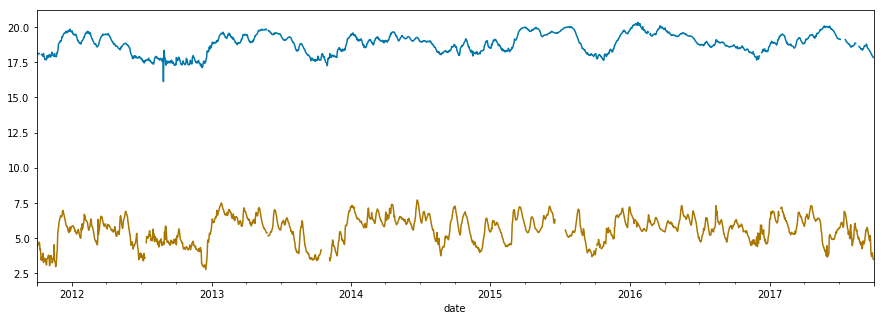

In [65]:
plt.figure(figsize=(15,5))
logT = df.turbidity.apply(math.log2)
logT.plot(color='#AA7700')
logQ = df['07374525'].apply(math.log2)
logQ.plot(color='#0077AA')
print(np.corrcoef(logT,logQ))

In [70]:
ind = df.corr()[df.corr()['turbidity']>0.3].index
ind = list(ind)

In [93]:
ws = 'Tennessee'
df[subset[ws]]
subset[ws]
stations.loc['03594500']

watershed                                       Tennessee
site_name             TENNESSEE RIVER AT PERRYVILLE, TENN
lat                                               35.6281
lon                                              -88.0345
drainage_area_sqmi                                  34540
gage_datum_ft                                         300
Turbidity                                            None
Discharge_start                                       NaN
Discharge_end                                         NaN
Discharge_count                                       NaN
Gage_start                                     2008-09-30
Gage_end                                       2018-01-25
Gage_count                                           8930
Name: 03594500, dtype: object

In [108]:
ws = 'Mississippi'
sts = stations.loc[subset[ws]].dropna(axis=0,subset=['Discharge_count','drainage_area_sqmi'])
ind = list(sts.sort_values('drainage_area_sqmi').index)
sts.sort_values('drainage_area_sqmi')

,watershed,site_name,lat,lon,drainage_area_sqmi,gage_datum_ft,Turbidity,Discharge_start,Discharge_end,Discharge_count,Gage_start,Gage_end,Gage_count
05207600,Mississippi,MISSISSIPPI RIVER AT WILLOW BEACH AT BALL CLUB...,47.302222,-93.901389,2850.0,1270.04,None,2007-10-01,2018-01-25,3770.0,NaN,NaN,NaN
05211000,Mississippi,"MISSISSIPPI RIVER AT GRAND RAPIDS, MN",47.232166,-93.530214,3370.0,1242.03,None,1883-09-17,2018-01-25,49074.0,NaN,NaN,NaN
05227500,Mississippi,"MISSISSIPPI RIVER AT AITKIN, MN",46.540513,-93.707471,6140.0,1182.41,None,1945-03-01,2018-01-25,26629.0,NaN,NaN,NaN
05242300,Mississippi,"MISSISSIPPI RIVER AT BRAINERD, MN",46.377744,-94.183328,7320.0,1146.96,None,1987-04-24,2018-01-25,11235.0,NaN,NaN,NaN
05270700,Mississippi,"MISSISSIPPI RIVER AT ST. CLOUD, MN",45.547187,-94.145822,13320.0,958.49,None,1988-10-01,2018-01-25,10694.0,NaN,NaN,NaN
05288500,Mississippi,"MISSISSIPPI RIVER AT HWY 610 IN BROOKLYN PARK, MN",45.126632,-93.296895,19100.0,804.74,None,1931-06-01,2018-01-25,31636.0,NaN,NaN,NaN
05331000,Mississippi,"MISSISSIPPI RIVER AT ST. PAUL, MN",44.944444,-93.088111,36800.0,683.77,None,1892-03-01,2018-01-25,45200.0,NaN,NaN,NaN
05331580,Mississippi,"MISSISSIPPI RIVER BELOW L&D #2 AT HASTINGS, MN",44.745833,-92.847778,37100.0,667.88,None,1995-10-01,2018-01-25,7422.0,NaN,NaN,NaN
05344500,Mississippi,"MISSISSIPPI RIVER AT PRESCOTT, WI",44.745801,-92.800203,44800.0,649.50,None,1928-06-01,2018-01-25,32745.0,NaN,NaN,NaN
05378500,Mississippi,"MISSISSIPPI RIVER AT WINONA, MN",44.055519,-91.637649,59200.0,639.64,None,1928-07-01,2018-01-25,32713.0,NaN,NaN,NaN


In [87]:
df[ind].corr().loc['03381700']

03086000    0.698840
03277200    0.830480
03294500    0.820786
03303280    0.897036
03381700    1.000000
Name: 03381700, dtype: float64

In [102]:
group1 = ['05331000', #Mississippi upstream
          '07249455','07133000',#Arkansas
          '06935965','06601200','06090300',#Missouri
          '03381700',#Ohio
          '03431500',#Cumberland
          '03594500',#Tenessee
          'turbidity']

In [115]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import seaborn as sns

In [188]:
data = df[group1].dropna()
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = data[group1[:-2]]

# Choose the response variable(s)
y = data['turbidity']*1000

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

# model = sm.OLS(y, X).fit()
# model.summary()

#sns.pairplot(data, size = 1.2, aspect=1.5);


0.32110535005624252

In [168]:
data = df[['07374525','turbidity']].dropna()
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = data['07374525']

# Choose the response variable(s)
y = data['turbidity']

# np.corrcoef(X,y)[1,0]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              turbidity   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     7770.
Date:                Sat, 27 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:44:09   Log-Likelihood:                -10171.
No. Observations:                2088   AIC:                         2.034e+04
Df Residuals:                    2087   BIC:                         2.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
07374525       0.0001    1.2e-06     88.150      0.000       0.000       0.000
==============================================================================
Omnibus:                       69.804   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.757
Skew:                           0.051   Prob(JB):                     4.61e-41
Kurtosis:                       4.458   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
def find_lag(X,Y,window_size=90):
    cc = np.corrcoef(X,Y)[0,1]
    lag = 0
    for k in range(1,window_size):
#        print(np.corrcoef(X[:-k],Y[k:])[0,1])
        if np.corrcoef(X[:-k],Y[k:])[0,1] > cc:
            cc = np.corrcoef(X[:-k],Y[k:])[0,1]
            lag = k
    return((cc,lag))


In [175]:
data.columns

Index(['05331000', '07249455', '07133000', '06935965', '06601200', '06090300',
       '03381700', '03431500', '03594500', 'turbidity'],
      dtype='object')

In [187]:
X = data['03594500']
y = data['turbidity']
(cc,lag) = find_lag(y,X)
print(cc,lag)
(cc,lag) = find_lag(X,y)
print(cc,lag)

0.43368528316 0
0.457107355043 4


In [156]:
x = np.sin(np.linspace(-np.pi,np.pi,180))
y = np.sin(np.linspace(-0.8*np.pi,1.2*np.pi,180))

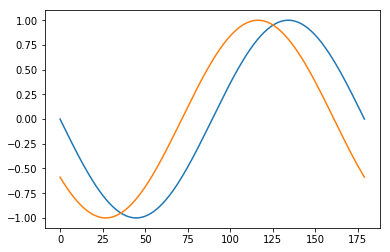

In [157]:
plt.plot(x)
plt.plot(y)

In [144]:
cc

5.7105139745653007e-17

In [131]:
y.shape

(2088,)